# Chargement

In [3]:
import pandas as pd 

dataframe = pd.read_csv("dataset.csv", sep=",", index_col=False)
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Nettoyage

In [4]:
dataframe["is_male"] = dataframe["sex"].apply( lambda x : 1 if x == "male" else 0)
dataframe["is_smoker"] = dataframe["smoker"].apply( lambda x : 1 if x == "yes" else 0)
dataframe["is_north"] = dataframe["region"].apply( lambda x : 1 if str(x).startswith("north") else 0)
dataframe["is_west"] = dataframe["region"].apply( lambda x : 1 if str(x).endswith("west") else 0)

dataframe2 = dataframe.drop("sex", axis=1)
dataframe2 = dataframe2.drop("smoker", axis=1)
dataframe2 = dataframe2.drop("region", axis=1)

dataframe2

,age,bmi,children,charges,is_male,is_smoker,is_north,is_west
0,19,27.900,0,16884.92400,0,1,0,1
1,18,33.770,1,1725.55230,1,0,0,0
2,28,33.000,3,4449.46200,1,0,0,0
3,33,22.705,0,21984.47061,1,0,1,1
4,32,28.880,0,3866.85520,1,0,1,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,1
1334,18,31.920,0,2205.98080,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,0,0
1336,21,25.800,0,2007.94500,0,0,0,1


In [5]:
dataframe2.describe()

,age,bmi,children,charges,is_male,is_smoker,is_north,is_west
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.485052,0.485800
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.499963,0.499985
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [6]:
import numpy as np
data = np.array(dataframe2, dtype=float)
data

array([[19.  , 27.9 ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  1.  ,  1.  ]], shape=(1338, 8))

In [7]:
# age 
(data[:, 0])

array([19., 18., 28., ..., 18., 21., 61.], shape=(1338,))

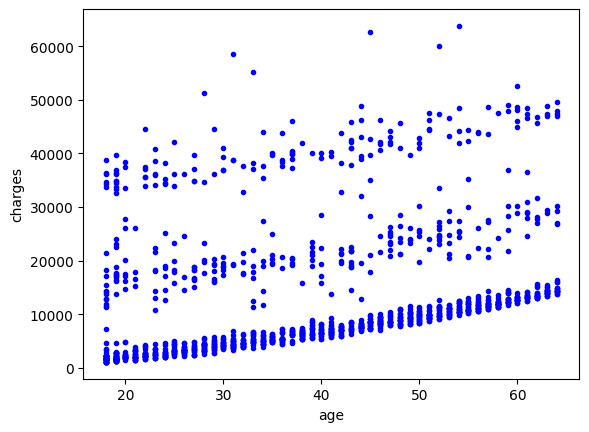

In [8]:
import matplotlib.pyplot as plt

def plot_data(x_label : str, x_values : np.ndarray, 
			  y_label : str, y_values : np.ndarray, 
			  plot_options : str):
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.plot(x_values, y_values, plot_options)
	
#Charges = f ( age )
plot_data("age", data[:, 0], "charges", data[:, 3], "b.")
plt.show()

# Analyse

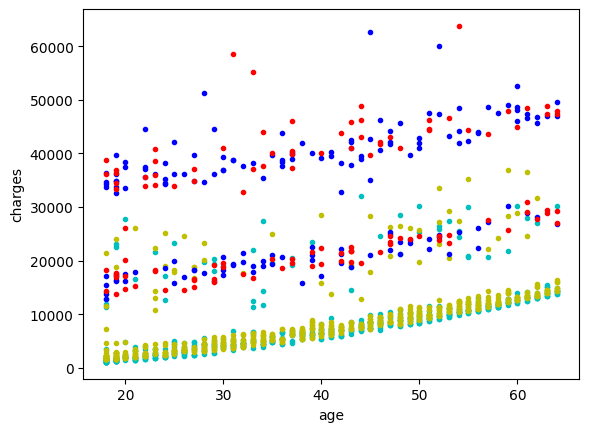

In [9]:
df_man_no_smoking = dataframe2[(dataframe2["is_male"]== 1) & (dataframe2["is_smoker"]== 0)]
df_woman_no_smoking = dataframe2[(dataframe2["is_male"]== 0) & (dataframe2["is_smoker"]== 0)]
df_man_smoking = dataframe2[(dataframe2["is_male"]== 1) & (dataframe2["is_smoker"]== 1)]
df_woman_smoking = dataframe2[(dataframe2["is_male"]== 0) & (dataframe2["is_smoker"]== 1)]

data_man_no_smoking = np.array(df_man_no_smoking, dtype=float)
data_woman_no_smoking = np.array(df_woman_no_smoking, dtype=float)
data_man_smoking = np.array(df_man_smoking, dtype=float)
data_woman_smoking = np.array(df_woman_smoking, dtype=float)

#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(data_man_no_smoking[:, 0], data_man_no_smoking[:, 3], "c.")
plt.plot(data_woman_no_smoking[:, 0], data_woman_no_smoking[:, 3] ,"y.")
plt.plot(data_man_smoking[:, 0], data_man_smoking[:, 3] ,"b.")
plt.plot(data_woman_smoking[:, 0], data_woman_smoking[:, 3] ,"r.")

plt.show()

In [10]:
description = dataframe2["bmi"].describe()
description


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

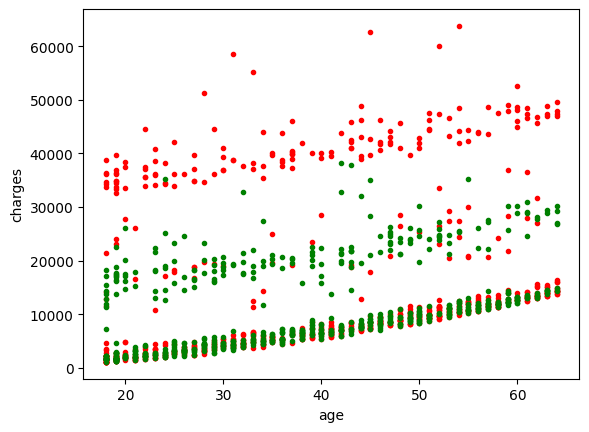

In [11]:
bmi_limit = 30

df_high_bmi = dataframe2[dataframe2["bmi"] > bmi_limit]
df_low_bmi = dataframe2[dataframe2["bmi"] <= bmi_limit]

data_high = np.array(df_high_bmi, dtype=float)
data_low = np.array(df_low_bmi, dtype=float)

#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(data_high[:, 0], data_high[:, 3], "r.")
plt.plot(data_low[:, 0], data_low[:, 3] ,"g.")

plt.show()

In [17]:
list(dataframe2.columns.array)


['age',
 'bmi',
 'children',
 'charges',
 'is_male',
 'is_smoker',
 'is_north',
 'is_west']

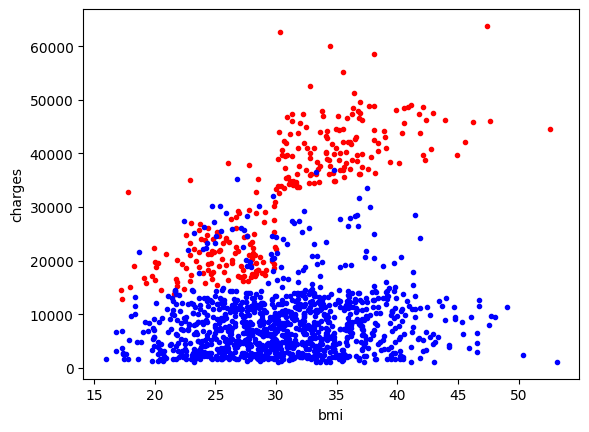

In [19]:

df_smoker = dataframe2[dataframe2["is_smoker"]==1]
df_no_smoker = dataframe2[dataframe2["is_smoker"]==0]

data_S = np.array(df_smoker)
data_N = np.array(df_no_smoker)

plt.xlabel("bmi")
plt.ylabel("charges")
plt.plot(data_S[:, 1], data_S[:, 3], "r.") # charges = f ( bmi )
plt.plot(data_N[:, 1], data_N[:,3], "b.") # charges = f ( bmi )
plt.show()


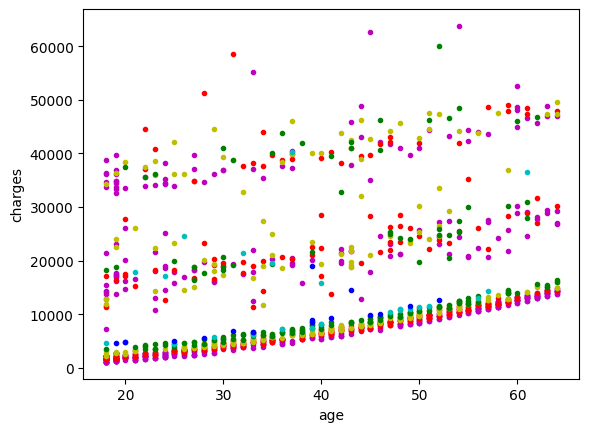

In [37]:

df_zero = dataframe2[dataframe2["children"] == 0]
df_one = dataframe2[dataframe2["children"] == 1]
df_two = dataframe2[dataframe2["children"] == 2]
df_three = dataframe2[dataframe2["children"] == 3]
df_four = dataframe2[dataframe2["children"] == 4]
df_five = dataframe2[dataframe2["children"] == 5]

data_zero = np.array(df_zero, dtype=float)
data_one = np.array(df_one, dtype=float)
data_two = np.array(df_two, dtype=float)
data_three = np.array(df_three, dtype=float)
data_four = np.array(df_four, dtype=float)
data_five = np.array(df_five, dtype=float)


#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(data_zero[:, 0], data_zero[:, 3], "m.")
plt.plot(data_one[:, 0], data_one[:, 3] ,"r.")
plt.plot(data_two[:, 0], data_two[:, 3] ,"y.")
plt.plot(data_three[:, 0], data_three[:, 3] ,"g.")
plt.plot(data_four[:, 0], data_four[:, 3] ,"c.")
plt.plot(data_five[:, 0], data_five[:, 3] ,"b.")

plt.show()

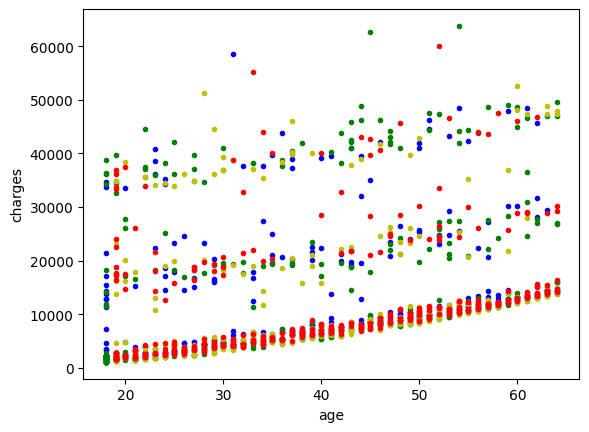

In [38]:
df_northeast = dataframe2[(dataframe2["is_north"] == 1) & (dataframe2["is_west"] == 0)]
df_southeast = dataframe2[(dataframe2["is_north"] == 0) & (dataframe2["is_west"] == 0)]
df_southwest = dataframe2[(dataframe2["is_north"] == 0) & (dataframe2["is_west"] == 1)]
df_northwest = dataframe2[(dataframe2["is_north"] == 1) & (dataframe2["is_west"] == 1)]

data_NE = np.array(df_northeast, dtype=float)
data_SE = np.array(df_southeast, dtype=float)
data_SW = np.array(df_southwest, dtype=float)
data_NW = np.array(df_northwest, dtype=float)

#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(data_NE[:, 0], data_NE[:, 3], "b.")
plt.plot(data_SE[:, 0], data_SE[:, 3] ,"g.")
plt.plot(data_SW[:, 0], data_SW[:, 3] ,"y.")
plt.plot(data_NW[:, 0], data_NW[:, 3] ,"r.")


plt.show()